In [2]:
import pandas
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [3]:
connection = sqlite3.connect('nearby_stars.db')
c = connection.cursor()

## Create power function

In [4]:
def power(base, exponent):
    return base**exponent
connection.create_function("power", 2, power)

## Add full age tables to database

In [3]:
age_tab = pandas.read_csv('gaspar13_agetable.csv')
age_tab.to_sql('gaspar13_agetable', connection)

In [15]:
age_tab = pandas.read_csv('ramirez13_agetable.csv')
age_tab.to_sql('ramirez13_agetable', connection)

In [88]:
age_tab = pandas.read_csv('ramirez12_agetable.csv')
age_tab.to_sql('ramirez12_agetable', connection)

In [22]:
age_tab = pandas.read_csv('isaacson10_agetable.csv')
age_tab.to_sql('isaacson10_agetable', connection)

In [61]:
for t in ['tsantaki13_agetable','casagrande11_agetable','chen01_agetable','david15_agetable','yee17_agetable']:
    age_tab = pandas.read_csv('{:s}.csv'.format(t))
    age_tab.to_sql(t, connection)

In [4]:
age_tab = pandas.read_csv('luck17_agetable.csv')
age_tab.to_sql('luck17_agetable', connection)

In [107]:
age_tab = pandas.read_csv('riedel14_agetable.csv')
age_tab.to_sql('riedel14_agetable', connection)

In [151]:
#age_tab = pandas.read_csv('brandt14_agetable.csv')
#age_tab.to_sql('brandt14_agetable', connection)

In [152]:
age_tab = pandas.read_csv('miles17_agetable.csv')
age_tab.to_sql('miles17_agetable', connection)

In [5]:
age_tab = pandas.read_csv('bryden09_agetable.csv')
age_tab.to_sql('bryden09_agetable', connection)

In [4]:
c.execute('PRAGMA table_info(gaspar13_agetable);')
c.fetchall()

[(0, u'index', u'INTEGER', 0, None, 0),
 (1, u'recno', u'INTEGER', 0, None, 0),
 (2, u'S', u'TEXT', 0, None, 0),
 (3, u'Name', u'TEXT', 0, None, 0),
 (4, u'n_Name', u'TEXT', 0, None, 0),
 (5, u'SpT', u'TEXT', 0, None, 0),
 (6, u'Age', u'REAL', 0, None, 0),
 (7, u'q_Age', u'REAL', 0, None, 0),
 (8, u'r_Age', u'TEXT', 0, None, 0),
 (9, u'P24', u'INTEGER', 0, None, 0),
 (10, u'P70', u'REAL', 0, None, 0),
 (11, u'P100', u'REAL', 0, None, 0),
 (12, u'F24', u'REAL', 0, None, 0),
 (13, u'e_F24', u'REAL', 0, None, 0),
 (14, u'R24', u'REAL', 0, None, 0),
 (15, u'F70', u'REAL', 0, None, 0),
 (16, u'e_F70', u'REAL', 0, None, 0),
 (17, u'chi70', u'REAL', 0, None, 0),
 (18, u'F100', u'REAL', 0, None, 0),
 (19, u'f_F100', u'TEXT', 0, None, 0),
 (20, u'e_F100', u'REAL', 0, None, 0),
 (21, u'chi100', u'REAL', 0, None, 0),
 (22, u'FIR?', u'TEXT', 0, None, 0),
 (23, u'DD', u'INTEGER', 0, None, 0),
 (24, u'_RA', u'REAL', 0, None, 0),
 (25, u'_DE', u'REAL', 0, None, 0)]

In [16]:
c.execute('PRAGMA table_info(ramirez13_agetable);')
c.fetchall()

[(0, u'index', u'INTEGER', 0, None, 0),
 (1, u'Name', u'TEXT', 0, None, 0),
 (2, u'Plx', u'REAL', 0, None, 0),
 (3, u'Age', u'REAL', 0, None, 0),
 (4, u'Age_lo1sig', u'REAL', 0, None, 0),
 (5, u'Age_hi1sig', u'REAL', 0, None, 0),
 (6, u'Age_lo2sig', u'REAL', 0, None, 0),
 (7, u'Age_hi2sig', u'REAL', 0, None, 0)]

In [89]:
c.execute('PRAGMA table_info(ramirez12_agetable);')
c.fetchall()

[(0, u'index', u'INTEGER', 0, None, 0),
 (1, u'HIP', u'INTEGER', 0, None, 0),
 (2, u'Age', u'REAL', 0, None, 0),
 (3, u'Age_lolim', u'REAL', 0, None, 0),
 (4, u'Age_hilim', u'REAL', 0, None, 0)]

In [23]:
c.execute('PRAGMA table_info(isaacson10_agetable);')
c.fetchall()

[(0, u'index', u'INTEGER', 0, None, 0),
 (1, u'recno', u'INTEGER', 0, None, 0),
 (2, u'Name', u'TEXT', 0, None, 0),
 (3, u'HIP', u'REAL', 0, None, 0),
 (4, u'B-V', u'REAL', 0, None, 0),
 (5, u'SHK', u'REAL', 0, None, 0),
 (6, u'Jitter', u'REAL', 0, None, 0),
 (7, u'logRHK', u'REAL', 0, None, 0),
 (8, u'dMag', u'REAL', 0, None, 0),
 (9, u'Prot', u'REAL', 0, None, 0),
 (10, u'Age', u'REAL', 0, None, 0),
 (11, u'Obs', u'TEXT', 0, None, 0),
 (12, u'SimbadName', u'TEXT', 0, None, 0),
 (13, u'_RA', u'REAL', 0, None, 0),
 (14, u'_DE', u'REAL', 0, None, 0)]

## Create subquery connecting star in Gaspar+2013 table to star in main simbad_FGK_nobinaries table

In [8]:
cmd = '''
SELECT LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD'))
FROM stars_FGK_nobinaries
    ---LEFT OUTER JOIN gaspar13_agetable
    ---ON LTRIM(LTRIM(LTRIM(gaspar13_agetable.Name,'HD')),'0') LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD'))
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

227
(u'22049',)
(u'10700',)
(u'20794',)
(u'190248',)
(u'219134',)
(u'2151',)
(u'157881',)
(u'217357',)
(u'115617',)
(u'1581',)
(u'192310',)
(u'32147',)
(u'23249',)
(u'103095',)
(u'203608',)
(u'151288',)
(u'122064',)
(u'103932',)
(u'43834',)
(None,)
(u'166620',)
(u'3651',)
(u'74576',)
(u'85512',)
(u'245409',)
(u'222237',)
(u'125072',)
(u'72673',)
(u'196877',)
(u'21531',)
(u'69830',)
(u'104304',)
(u'190007',)
(u'101581',)
(u'82106',)
(u'158633',)
(u'14412',)
(u'40307',)
(u'27274',)
(u'211970',)
(u'170657',)
(u'29697',)
(u'30495',)
(u'128165',)
(u'214749',)
(None,)
(u'10436',)
(u'22496',)
(u'145417',)
(u'154577',)
(u'95128',)
(u'281621',)
(u'23356',)
(u'22484',)
(u'5133',)
(u'120467',)
(u'110315',)
(u'150689',)
(u'234078',)
(u'173818',)
(u'72905',)
(None,)
(None,)
(u'52698',)
(u'196761',)
(u'197692',)
(u'136352',)
(None,)
(u'142709',)
(None,)
(u'205390',)
(u'84117',)
(u'144628',)
(u'218511',)
(u'40136',)
(u'105452',)
(None,)
(u'118926',)
(u'7570',)
(u'38858',)
(u'21197',)
(u'217014',)
(u'

In [9]:
cmd = '''
SELECT gaspar13_agetable.Name, RTRIM(LTRIM(LTRIM(LTRIM(gaspar13_agetable.Name,'HD')),'0'))
FROM gaspar13_agetable
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

374
(u'HD 000038 ', u'38')
(u'HD 000739 ', u'739')
(u'HD 001237 ', u'1237')
(u'HD 001326 ', u'1326')
(u'HD 001404 ', u'1404')
(u'HD 001581 ', u'1581')
(u'HD 001835 ', u'1835')
(u'HD 002262 ', u'2262')
(u'HD 003196 ', u'3196')
(u'HD 004391 ', u'4391')
(u'HD 004628 ', u'4628')
(u'HD 004676 ', u'4676')
(u'HD 004747 ', u'4747')
(u'HD 004967 ', u'4967')
(u'HD 005448 ', u'5448')
(u'HD 007439 ', u'7439')
(u'HD 007570 ', u'7570')
(u'HD 007788 ', u'7788')
(u'HD 009540 ', u'9540')
(u'HD 010307 ', u'10307')
(u'HD 010361 ', u'10361')
(u'HD 010476 ', u'10476')
(u'HD 011171 ', u'11171')
(u'HD 011636 ', u'11636')
(u'HD 013161 ', u'13161')
(u'HD 013974 ', u'13974')
(u'HD 014055 ', u'14055')
(u'HD 015008 ', u'15008')
(u'HD 016160 ', u'16160')
(u'HD 016555 ', u'16555')
(u'HD 016673 ', u'16673')
(u'HD 016754 ', u'16754')
(u'HD 016765 ', u'16765')
(u'HD 016970 ', u'16970')
(u'HD 017051 ', u'17051')
(u'HD 017093 ', u'17093')
(u'HD 017206 ', u'17206')
(u'HD 018978 ', u'18978')
(u'HD 019107 ', u'19107')
(u'H

In [45]:
cmd = '''
SELECT gaspar13_agetable.Name, stars_FGK_nobinaries.HD, stars_FGK_nobinaries.HIP, gaspar13_agetable.Age
FROM gaspar13_agetable
    INNER JOIN stars_FGK_nobinaries
    ON (RTRIM(LTRIM(LTRIM(LTRIM(gaspar13_agetable.Name,'HD')),'0')) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD')))
    OR (RTRIM(LTRIM(LTRIM(LTRIM(gaspar13_agetable.Name,'HIP')),'0')) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HIP,'HIP')))
WHERE gaspar13_agetable.Age is NOT NULL
    
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

87
(u'HD 001581 ', u'HD   1581', u'HIP   1599', 382.0)
(u'HD 007570 ', u'HD   7570', u'HIP   5862', 530.0)
(u'HD 017051 ', u'HD  17051', u'HIP  12653', 120.0)
(u'HD 020794 ', u'HD  20794', u'HIP  15510', 620.0)
(u'HD 021197 ', u'HD  21197', u'HIP  15919', 150.0)
(u'HD 022484 ', u'HD  22484', u'HIP  16852', 670.0)
(u'HD 022496 ', u'HD  22496', u'HIP  16711', 130.0)
(u'HD 023754 ', u'HD  23754', u'HIP  17651', 400.0)
(u'HD 036435 ', u'HD  36435', u'HIP  25544', 50.0)
(u'HD 039091 ', u'HD  39091', u'HIP  26394', 580.0)
(u'HD 071243 ', u'HD  71243', u'HIP  40702', 150.0)
(u'HD 084737 ', u'HD  84737', u'HIP  48113', 930.0)
(u'HD 101581 ', u'HD 101581', u'HIP  56998', 260.0)
(u'HD 105452 ', u'HD 105452', u'HIP  59199', 100.0)
(u'HD 109085 ', u'HD 109085', u'HIP  61174', 240.0)
(u'HD 110315 ', u'HD 110315', u'HIP  61901', 660.0)
(u'HD 115617 ', u'HD 115617', u'HIP  64924', 502.0)
(u'HD 120467 ', u'HD 120467', u'HIP  67487', 435.0)
(u'HD 136923 ', u'HD 136923', u'HIP  75277', 300.0)
(u'HD 1397

## Subquery for Ramirez+2013

In [61]:
cmd = '''
SELECT stars_FGK_nobinaries.hip, ramirez13_agetable.Name, 
stars_FGK_nobinaries.hd, ramirez13_agetable.Name, ramirez13_agetable.Plx, ramirez13_agetable.Age
FROM ramirez13_agetable
    INNER JOIN stars_FGK_nobinaries
    ON (RTRIM(LTRIM(LTRIM(ramirez13_agetable.Name,'HIP'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HIP,'HIP')))
    OR (RTRIM(LTRIM(LTRIM(ramirez13_agetable.Name,'HD'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD')))
WHERE ramirez13_agetable.Age IS NOT Null
ORDER BY Plx DESC
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

43
(u'HIP  16537', u'HIP 16537 ', u'HD  22049', u'HIP 16537 ', 310.94, 9.45)
(u'HIP   8102', u'HIP 8102  ', u'HD  10700', u'HIP 8102  ', 273.96, 13.16)
(u'HIP  15510', u'HIP 15510 ', u'HD  20794', u'HIP 15510 ', 165.47, 14.26)
(u'HIP  99240', u'HIP 99240 ', u'HD 190248', u'HIP 99240 ', 163.71, 10.65)
(u'HIP 114622', u'HIP 114622', u'HD 219134', u'HIP 114622', 152.76, 10.93)
(u'HIP   2021', u'HIP 2021  ', u'HD   2151', u'HIP 2021  ', 134.07, 6.09)
(u'HIP  64924', u'HIP 64924 ', u'HD 115617', u'HIP 64924 ', 116.89, 9.18)
(u'HIP   1599', u'HIP 1599  ', u'HD   1581', u'HIP 1599  ', 116.46, 6.31)
(u'HIP  99825', u'HIP 99825 ', u'HD 192310', u'HIP 99825 ', 112.22, 9.41)
(u'HIP  57939', u'HIP 57939 ', u'HD 103095', u'HIP 57939 ', 109.99, 13.88)
(u'HIP 105858', u'HIP 105858', u'HD 203608', u'HIP 105858', 107.97, 6.86)
(u'HIP  68184', u'HIP 68184 ', u'HD 122064', u'HIP 68184 ', 99.36, 13.89)
(u'HIP  29271', u'HIP 29271 ', u'HD  43834', u'HIP 29271 ', 98.06, 6.28)
(u'HIP   3093', u'HIP 3093  ', 

## Subquery for Ramirez+2012

In [92]:
cmd = '''
SELECT stars_FGK_nobinaries.hip, ramirez12_agetable.hip, ramirez12_agetable.Age
FROM ramirez12_agetable
    INNER JOIN stars_FGK_nobinaries
    ON ramirez12_agetable.hip LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HIP,'HIP'))
WHERE ramirez12_agetable.Age IS NOT Null
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

86
(u'HIP   3206', 3206, 4.94)
(u'HIP  40843', 40843, 3.3)
(u'HIP  44897', 44897, 0.8)
(u'HIP  53721', 53721, 6.82)
(u'HIP  48113', 48113, 5.85)
(u'HIP  34017', 34017, 6.8)
(u'HIP  35136', 35136, 7.63)
(u'HIP  42438', 42438, 0.2)
(u'HIP  71395', 71395, 0.3)
(u'HIP  67275', 67275, 0.4)
(u'HIP  78459', 78459, 2.5)
(u'HIP  77760', 77760, 6.85)
(u'HIP  79248', 79248, 2.53)
(u'HIP  62207', 62207, 9.45)
(u'HIP  85235', 85235, 8.67)
(u'HIP  68184', 68184, 8.71)
(u'HIP 107350', 107350, 0.2)
(u'HIP  98505', 98505, 0.4)
(u'HIP 114622', 114622, 9.45)
(u'HIP 100017', 100017, 4.81)
(u'HIP 116763', 116763, 7.23)
(u'HIP    910', 910, 5.65)
(u'HIP   8102', 8102, 5.6)
(u'HIP   3909', 3909, 1.72)
(u'HIP   3093', 3093, 6.7)
(u'HIP 113357', 113357, 5.2)
(u'HIP  33817', 33817, 2.0)
(u'HIP  22263', 22263, 0.4)
(u'HIP  28103', 28103, 1.26)
(u'HIP  27435', 27435, 7.5)
(u'HIP  23311', 23311, 4.5)
(u'HIP  18859', 18859, 2.65)
(u'HIP  16852', 16852, 6.0)
(u'HIP  29525', 29525, 0.4)
(u'HIP  57507', 57507, 12.5)
(

## Subquery for Isaacson+2010

In [41]:
cmd = '''
SELECT RTRIM(LTRIM(LTRIM(isaacson10_agetable.Name,'HD'))), RTRIM(LTRIM(LTRIM(isaacson10_agetable.Name,'HIP'))), isaacson10_agetable.Age
FROM isaacson10_agetable
    INNER JOIN stars_FGK_nobinaries
    ON (RTRIM(LTRIM(LTRIM(isaacson10_agetable.Name,'HD'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD'))) OR
    (RTRIM(LTRIM(LTRIM(isaacson10_agetable.Name,'HIP'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.hip,'HIP')))
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

48
(u'25329', u'D 25329', 6.05)
(u'7924', u'D 7924', 4.65)
(u'69897', u'D 69897', 3.57)
(u'78366', u'D 78366', 0.86)
(u'95128', u'D 95128', 6.1)
(u'84737', u'D 84737', 8.19)
(u'65583', u'D 65583', 6.52)
(u'52711', u'D 52711', 6.4)
(u'55575', u'D 55575', 6.31)
(u'72905', u'D 72905', 0.13)
(u'62613', u'D 62613', 4.95)
(u'136923', u'D 136923', 1.96)
(u'143761', u'D 143761', 7.57)
(u'154345', u'D 154345', 3.74)
(u'142373', u'D 142373', 5.9)
(u'110897', u'D 110897', 6.08)
(u'158633', u'D 158633', 5.84)
(u'206860', u'D 206860', 0.28)
(u'190404', u'D 190404', 7.17)
(u'221354', u'D 221354', 7.84)
(u'216520', u'D 216520', 5.19)
(u'222335', u'D 222335', 3.6)
(u'220339', u'D 220339', 4.2)
(u'10700', u'D 10700', 6.15)
(u'4813', u'D 4813', 4.19)
(u'217014', u'D 217014', 7.62)
(u'30495', u'D 30495', 0.78)
(u'38858', u'D 38858', 5.72)
(u'41593', u'D 41593', 0.32)
(u'50692', u'D 50692', 6.53)
(u'115617', u'D 115617', 5.9)
(u'104304', u'D 104304', 7.35)
(u'115383', u'D 115383', 0.38)
(u'111395', u'D 11

## Subquery for Tsantaki+2013

In [67]:
cmd = '''
SELECT RTRIM(LTRIM(LTRIM(tsantaki13_agetable.Star,'HD'))), RTRIM(LTRIM(LTRIM(tsantaki13_agetable.Star,'HIP'))), 
tsantaki13_agetable.Age, tsantaki13_agetable.e_Age
FROM tsantaki13_agetable
    INNER JOIN stars_FGK_nobinaries
    ON (RTRIM(LTRIM(LTRIM(tsantaki13_agetable.Star,'HD'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD'))) OR
    (RTRIM(LTRIM(LTRIM(tsantaki13_agetable.Star,'HIP'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.hip,'HIP')))
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

40
(u'55', u'D 55', 4.531000000000001, 3.824)
(u'1581', u'D 1581', 2.191, 1.052)
(u'2025', u'D 2025', 4.5569999999999995, 4.047)
(u'22049', u'D 22049', 3.5780000000000003, 3.322)
(u'23249', u'D 23249', 7.691, 0.37200000000000005)
(u'23356', u'D 23356', 4.371, 4.407)
(u'31560', u'D 31560', 4.376, 4.0680000000000005)
(u'35854', u'D 35854', 4.8069999999999995, 4.047)
(u'38858', u'D 38858', 2.01, 1.358)
(u'39091', u'D 39091', 0.7709999999999999, 0.491)
(u'40307', u'D 40307', 5.515, 3.946)
(u'52919', u'D 52919', 4.408, 4.01)
(u'69830', u'D 69830', 4.263999999999999, 4.178999999999999)
(u'72673', u'D 72673', 7.07, 3.759)
(u'76151', u'D 76151', 0.295, 0.21100000000000002)
(u'85512', u'D 85512', 4.5569999999999995, 4.125)
(u'101581', u'D 101581', 4.477, 4.032)
(u'102438', u'D 102438', 10.021, 1.4680000000000002)
(u'109200', u'D 109200', 7.689, 3.6319999999999997)
(u'115617', u'D 115617', 8.986, 1.575)
(u'125072', u'D 125072', 4.539, 4.141)
(u'130992', u'D 130992', 4.32, 4.216)
(u'142709', u'D 

## Subquery for Casagrande+2011

Has ages using two different isochrones. No additional stars added, so do not include this table for now.

In [49]:
cmd = '''
SELECT t.HIP, t.Name, t.ageMP, t.age16P, t.age84P
FROM casagrande11_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON t.HIP LIKE LTRIM(LTRIM(s.hip,'HIP')) OR
    (RTRIM(LTRIM(LTRIM(t.Name,'HD'))) LIKE LTRIM(LTRIM(s.hip,'HD'))) OR
    REPLACE(LTRIM(t.Name,'BD'),' ','') LIKE REPLACE(LTRIM(s.main_id,'BD'),' ','')
    LEFT OUTER JOIN ages AS a ON a.sid = s.sid
--WHERE a.sid IS NULL
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

498
(18915, u'HD 25329', 7.41, 3.9, 11.39)
(18915, u'HD 25329', 7.41, 3.9, 11.39)
(18915, u'HD 25329', 7.41, 3.9, 11.39)
(3206, u'HD 3765', 6.57, 2.1, 11.3)
(3206, u'HD 3765', 6.57, 2.1, 11.3)
(3206, u'HD 3765', 6.57, 2.1, 11.3)
(3206, u'HD 3765', 6.57, 2.1, 11.3)
(19422, u'HD 25665', 7.63, 2.69, 11.98)
(8070, u'HD 10436', 7.88, 3.38, 11.94)
(8070, u'HD 10436', 7.88, 3.38, 11.94)
(18774, u'HD 24451', 7.74, 3.08, 11.97)
(18774, u'HD 24451', 7.74, 3.08, 11.97)
(40843, u'HD 69897', 2.35, 1.48, 3.09)
(40843, u'HD 69897', 2.35, 1.48, 3.09)
(40843, u'HD 69897', 2.35, 1.48, 3.09)
(40843, u'HD 69897', 2.35, 1.48, 3.09)
(40843, u'HD 69897', 2.35, 1.48, 3.09)
(40843, u'HD 69897', 2.35, 1.48, 3.09)
(40843, u'HD 69897', 2.35, 1.48, 3.09)
(44897, u'HD 78366', 2.1, 0.68, 3.85)
(44897, u'HD 78366', 2.1, 0.68, 3.85)
(44897, u'HD 78366', 2.1, 0.68, 3.85)
(44897, u'HD 78366', 2.1, 0.68, 3.85)
(44897, u'HD 78366', 2.1, 0.68, 3.85)
(53721, u'HD 95128', 6.25, 4.98, 7.51)
(53721, u'HD 95128', 6.25, 4.98, 7.

## Subquery for Chen+2001

In [154]:
cmd = '''
SELECT t.Name, s.main_id, RTRIM(LTRIM(LTRIM(t.Name,'HD'))), RTRIM(LTRIM(LTRIM(t.Name,'HIP'))), REPLACE(LTRIM(t.Name,'BD'),' ',''),
t.Age, t.u_Age
FROM chen01_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON 
    (RTRIM(LTRIM(LTRIM(t.Name,'HD'))) LIKE LTRIM(LTRIM(s.HD,'HD'))) OR
    (RTRIM(LTRIM(LTRIM(t.Name,'HIP'))) LIKE LTRIM(LTRIM(s.hip,'HIP'))) OR
    REPLACE(LTRIM(t.Name,'BD'),' ','') LIKE REPLACE(LTRIM(s.main_id,'BD'),' ','') OR
    REPLACE(LTRIM(t.Name,'CD'),' ','') LIKE REPLACE(LTRIM(s.main_id,'CD'),' ','')
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

13
(u'HD   693', u'*   6 Cet', u'693', u'D   693', u'HD693', 4.8, u' ')
(u'HD  4813', u'* phi02 Cet', u'4813', u'D  4813', u'HD4813', 3.8, u' ')
(u'HD 22484', u'*  10 Tau', u'22484', u'D 22484', u'HD22484', 6.3, u' ')
(u'HD 25457', u'HD  25457', u'25457', u'D 25457', u'HD25457', 3.5, u' ')
(u'HD 55575', u'HD  55575', u'55575', u'D 55575', u'HD55575', 10.6, u' ')
(u'HD 69897', u'* chi Cnc', u'69897', u'D 69897', u'HD69897', 3.3, u' ')
(u'HD 95128', u'*  47 UMa', u'95128', u'D 95128', u'HD95128', 12.1, u' ')
(u'HD110897', u'*  10 CVn', u'110897', u'D110897', u'HD110897', 14.5, u' ')
(u'HD142373', u'* chi Her', u'142373', u'D142373', u'HD142373', 9.7, u' ')
(u'HD143761', u'* rho CrB', u'143761', u'D143761', u'HD143761', 11.2, u' ')
(u'HD157347', u'HD 157347', u'157347', u'D157347', u'HD157347', 7.7, u' ')
(u'HD203608', u'* gam Pav', u'203608', u'D203608', u'HD203608', 7.2, u' ')
(u'HD206860', u'HD 206860', u'206860', u'D206860', u'HD206860', 9.9, u' ')


## Subquery for David+2015

In [158]:
cmd = '''
SELECT t.HIP, s.main_id, t.Ageavg/1e3, t.Agemed/1e3, t.Age68lo/1e3, t.Age68up/1e3
FROM david15_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON t.HIP LIKE LTRIM(LTRIM(s.hip,'HIP'))
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

11
(28103, u'* eta Lep', 1.283, 1.394, 1.155, 1.779)
(32362, u'* ksi Gem', 1.391, 1.698, 0.841, 4.34)
(59199, u'* alf Crv', 0.558, 0.729, 0.398, 1.54)
(61174, u'* eta Crv', 0.814, 1.012, 0.537, 2.243)
(86736, u'*  58 Oph', 2.652, 2.558, 1.717, 3.236)
(92043, u'* 110 Her', 3.185, 3.107, 2.234, 4.418)
(17651, u'* tau06 Eri', 1.694, 2.0, 1.223, 4.097)
(50954, u'* I Car', 0.977, 1.259, 0.75, 2.113)
(40702, u'* alf Cha', 1.801, 1.939, 1.417, 2.567)
(76829, u'* g Lup', 1.902, 1.995, 1.496, 2.441)
(102485, u'* psi Cap', 1.907, 1.866, 1.403, 2.38)


## Subquery for Yee+2017

Age uncertainties really large from this source, and ages exceed age of the universe... hmm.

<s>I will not add this table for now.</s>
I will add these table without the uncertainties for now.

In [99]:
cmd = '''
SELECT t.Name, POWER(10,t.logAge-9), POWER(10,logAge-t.e_logAge-9), POWER(10,logAge+t.e_logAge-9)
--SELECT t.Name, POWER(10,t.logAge-9), t.e_logAge, POWER(10,t.e_logAge), POWER(10,t.e_logAge)/POWER(10,t.logAge-9)
FROM yee17_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON (RTRIM(LTRIM(LTRIM(t.Name,'HD'))) LIKE LTRIM(LTRIM(s.HD,'HD'))) OR
    (RTRIM(LTRIM(LTRIM(t.Name,'HIP'))) LIKE LTRIM(LTRIM(s.hip,'HIP'))) OR 
    (RTRIM(LTRIM(LTRIM(t.Name,'GL'))) LIKE LTRIM(LTRIM(s.gj,'GJ'))) 
--WHERE s.sp_type LIKE 'M%' AND 1e3/s.plx_value < 10
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

85
(u'HD 128311', 8.91250938133744, 2.8840315031265997, 27.542287033381633)
(u'HD 130307', 5.4954087385762485, 1.698243652461746, 17.78279410038923)
(u'HD 170657', 6.456542290346563, 2.041737944669532, 20.417379446695318)
(u'HD 189733', 7.762471166286928, 2.5118864315095824, 23.988329190194946)
(u'HD 202575', 9.120108393559116, 3.090295432513592, 26.91534803926925)
(u'HD 220339', 6.16595001861481, 1.8620871366628655, 20.417379446695232)
(u'HD 31560', 10.0, 3.5481338923357604, 28.18382931264449)
(u'HD 42807', 2.1379620895022327, 0.9772372209558111, 4.677351412871981)
(u'HD 5133', 5.623413251903491, 1.698243652461746, 18.620871366628656)
(u'HD 84737', 6.309573444801943, 4.7863009232264, 8.317637711026709)
(u'HD 87883', 8.317637711026709, 2.754228703338163, 25.11886431509582)
(u'HIP 105341', 4.3651583224016655, 1.3182567385564101, 14.45439770745928)
(u'HIP 15095', 4.073802778041122, 1.2302687708123812, 13.489628825916505)
(u'HIP 40375', 3.5481338923357604, 1.0715193052376093, 11.748975549

## Subquery for Luck+2017

In [63]:
cmd = '''
SELECT *
FROM luck17_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON (RTRIM(LTRIM(LTRIM(t.HD,'HD'))) LIKE LTRIM(LTRIM(s.HD,'HD'))) OR
    (RTRIM(LTRIM(LTRIM(t.HIP,'HIP'))) LIKE LTRIM(LTRIM(s.hip,'HIP')))
    LEFT OUTER JOIN ages as a ON a.sid = s.sid
WHERE a.sid IS Null
--WHERE t."<Age>" IS NULL
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

5
(213, u'HD 232979', u'232979 ', 21553.0, 10.1, None, None, None, None, None, None, 302, u'HD 232979', u'69.4205447608177', u'52.8936141785169', u'HD 232979', u'GJ   172', u'HIP  21553', None, u'M0.5V', u'1989ApJS...71..245K', 100.7797, 0.064, u'2018yCat.1345....0G', 8.863, 0.1, u'2012yCat.1322....0Z', 7.9495, 0.0006, u'2018yCat.1345....0G')
(451, u'V* DS Leo', u'95650  ', 53985.0, 11.8, None, None, None, None, None, None, 371, u'V* DS Leo', u'165.659758026371', u'21.9671401332591', u'HD  95650', u'GJ   410', u'HIP  53985', None, u'M1.0V', u'2013AJ....145..102L', 83.7765, 0.0573, u'2018yCat.1345....0G', 9.572000000000001, None, u'2010MNRAS.403.1949K', 8.807, 0.0008, u'2018yCat.1345....0G')
(552, u'HD 122303', u'122303 ', 68469.0, 10.0, None, None, None, None, None, None, 312, u'HD 122303', u'210.2632841162', u'-2.65486525585167', u'HD 122303', u'GJ   536', u'HIP  68469', None, u'M0V', u'1986AJ.....92..139S', 96.0398, 0.0872, u'2018yCat.1345....0G', 9.707, None, u'2010MNRAS.403.1949K',

Why did adding this table not increase # of stars with ages even with query result above?

## Subquery for Riedel+2014

In [130]:
cmd = '''
SELECT s.sid, s.main_id, s.GJ, t.Name, t.Age, t.l_Age
FROM riedel14_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON REPLACE(t.Name,' ','') = REPLACE(s.main_id,' ','')
        OR REPLACE(t.Name,' ','') = REPLACE(s.gj,' ','')
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

4
(334, u'L   34-26', None, u'L 34-26', 2.0, u'<')
(269, u'G 154-44', u'GJ  1224', u'GJ 1224', 4.5, u'<')
(240, u'G  99-49', u'GJ  3379', u'G 99-49', 3.0, u'<')
(279, u'G  19-7', u'GJ  1207', u'GJ 1207', 3.0, u'<')


## Subquery for Brandt+2014

In [147]:
cmd = '''
SELECT s.sid, t.Name, s.main_id, s.GJ, s.hip, s.hd, t.Age10/1e3, t.Age50/1e3, t.Age90/1e3, 1e3/s.plx_value
FROM brandt14_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON REPLACE(t.Name,' ','') = REPLACE(s.main_id,' ','')
        OR REPLACE(t.Name,' ','') = REPLACE(s.gj,' ','')
        OR REPLACE(t.Name,' ','') = REPLACE(s.hip,' ','')
        OR REPLACE(t.Name,' ','') = REPLACE(s.hd,' ','')
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

9
(235, u'HIP 80824', u'BD-12  4523', u'GJ   628', u'HIP  80824', None, 3.98, 5.37, 7.19, 4.306456023547701)
(251, u'HIP 37766', u'V* YZ CMi', u'GJ   285', u'HIP  37766', None, 0.061, 0.181, 0.3, 5.987357096754494)
(260, u'HIP 53020', u'Wolf  358', u'GJ   402', u'HIP  53020', None, 5.16, 7.5, 9.55, 6.968781947509741)
(261, u'HIP 51317', u'BD+01  2447', u'GJ   393', u'HIP  51317', None, 0.117, 0.13, 0.146, 7.032917570689612)
(426, u'HIP 9291', u'Ross   15', u'GJ    82', u'HIP   9291', None, 0.023, 0.033, 0.304, 13.134822384364307)
(525, u'HIP 112909', u'V* GT Peg', u'GJ  9799,GJ   875.1', u'HIP 112909', None, 0.021, 0.096, 0.202, 15.05638616619239)
(526, u'HIP 37288', u'BD+02  1729', u'GJ   281', u'HIP  37288', None, 1.78, 2.62, 3.83, 15.057837152502763)
(662, u'HIP 17695', u'G  80-21', None, u'HIP  17695', None, 0.084, 0.211, 0.339, 16.80217621786374)
(670, u'HIP 65016', u'Ross 1007', u'GJ   507.1,GJ  9440', u'HIP  65016', None, 4.08, 5.62, 7.81, 16.861273869240822)


## Subquery for Miles+2017

In [168]:
cmd = '''
SELECT t.Name, s.main_id, s.gj, s.hip, s.hd, t.Age/1e3, 1e3/s.plx_value, s.sp_type
FROM miles17_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON REPLACE(t.Name,' ','') = REPLACE(s.main_id,' ','')
        OR REPLACE(t.Name,' ','') = REPLACE(s.gj,' ','')
        OR REPLACE(t.Name,' ','') = REPLACE(s.hip,' ','')
        OR REPLACE(t.Name,' ','') = REPLACE(s.hd,' ','')
--WHERE s.sp_type LIKE 'M%' AND 1e3/plx_value < 10
WHERE t.Age/1e3 <> 5
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

4
(u'GJ3136', u'G 173-39', u'GJ  3136', None, None, 0.1, 17.065341486015804, u'M4.0V')
(u'G80-21', u'G  80-21', None, u'HIP  17695', None, 0.1, 16.80217621786374, u'M3.0V')
(u'BD+012447', u'BD+01  2447', u'GJ   393', u'HIP  51317', None, 0.1, 7.032917570689612, u'M2.0Ve')
(u'HD95650', u'V* DS Leo', u'GJ   410', u'HIP  53985', u'HD  95650', 0.3, 11.936521578246884, u'M1.0V')


## Subquery for Bryden+2009

In [27]:
cmd = '''
SELECT t.Name, t.Age, t.OName, s.main_id
FROM bryden09_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON REPLACE(t.Name,' ','') = REPLACE(s.main_id,' ','')
        OR REPLACE(t.Name,' ','') = REPLACE(s.gj,' ','')
        OR REPLACE(t.Name,' ','') = REPLACE(s.hd,' ','')
        OR REPLACE(t.Oname,' ','') = REPLACE(REPLACE(s.main_id,' ',''),'*','')
--WHERE s.sp_type LIKE 'M%' AND 1e3/plx_value < 10
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

24
(u'HD 3651   ', 6.2, u'54 Psc  ', u'*  54 Psc')
(u'HD 10647  ', 2.0, u'        ', u'* q01 Eri')
(u'HD 17051  ', 0.9, u'iot Hor ', u'* iot Hor')
(u'HD 22049  ', 0.8, u'eps Eri ', u'* eps Eri')
(u'HD 39091  ', 5.3, u'        ', u'* pi. Men')
(u'HD 39091  ', 5.3, u'        ', u'* pi. Men')
(u'HD 40307  ', 7.3, u'        ', u'HD  40307')
(u'HD 69830  ', 6.0, u'        ', u'HD  69830')
(u'HD 95128  ', 6.4, u'47 UMa  ', u'*  47 UMa')
(u'HD 117176 ', 8.8, u'70 Vir  ', u'*  70 Vir')
(u'HD 120136 ', 0.6, u'tau Boo ', u'* tau Boo')
(u'HD 128311 ', 0.4, u'        ', u'HD 128311')
(u'HD 143761 ', 4.5, u'rho CrB ', u'* rho CrB')
(u'HD 145675 ', 8.1, u'14 Her  ', u'*  14 Her')
(u'HD 154345 ', 5.0, u'        ', u'HD 154345')
(u'HD 160691 ', 7.5, u'mu Ara  ', u'* mu. Ara')
(u'HD 189733 ', 0.9, u'        ', u'HD 189733')
(u'HD 192263 ', 0.4, u'        ', u'HD 192263')
(u'HD 217014 ', 7.3, u'51 Peg  ', u'*  51 Peg')
(u'GJ 436    ', 10.1, u'        ', u'Ross  905')
(u'GJ 581    ', 1.0, u'        ', u'

## Add new ages to table

(Added spectral type constraint below to only add ages for M stars)

In [26]:
cmd = '''
SELECT * FROM ages WHERE bibcode = ''
'''
c.execute(cmd)
rows=c.fetchall()
print len(rows)

13


In [27]:
cmd = '''
DELETE FROM ages
WHERE bibcode = ''
'''
c.execute(cmd)

In [16]:
cmd = '''
INSERT INTO ages (age, bibcode, sid)
SELECT gaspar13_agetable.Age/100, '2013ApJ...768...25G', stars_FGK_nobinaries.sid
FROM gaspar13_agetable
    INNER JOIN stars_FGK_nobinaries
    ON (RTRIM(LTRIM(LTRIM(LTRIM(gaspar13_agetable.Name,'HD')),'0')) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD')))
    OR (RTRIM(LTRIM(LTRIM(LTRIM(gaspar13_agetable.Name,'HIP')),'0')) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HIP,'HIP')))
WHERE gaspar13_agetable.Age is NOT NULL
AND stars_FGK_nobinaries.sp_type LIKE 'M%'
'''
c.execute(cmd)

In [17]:
cmd = '''
INSERT INTO ages (age, age_lo, age_hi, bibcode, sid)
SELECT ramirez13_agetable.Age, ramirez13_agetable.Age_lo1sig, ramirez13_agetable.Age_hi1sig,  
'2013ApJ...764...78R', stars_FGK_nobinaries.sid
FROM ramirez13_agetable
    INNER JOIN stars_FGK_nobinaries
    ON (RTRIM(LTRIM(LTRIM(ramirez13_agetable.Name,'HIP'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HIP,'HIP')))
    OR (RTRIM(LTRIM(LTRIM(ramirez13_agetable.Name,'HD'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD')))
WHERE ramirez13_agetable.Age is NOT NULL
AND stars_FGK_nobinaries.sp_type LIKE 'M%'
'''
c.execute(cmd)

In [18]:
cmd = '''
INSERT INTO ages (age, age_lo, age_hi, bibcode, sid)
SELECT ramirez12_agetable.Age, ramirez12_agetable.Age_lolim, ramirez12_agetable.Age_hilim,
'2012ApJ...756...46R', stars_FGK_nobinaries.sid
FROM ramirez12_agetable
    INNER JOIN stars_FGK_nobinaries
    ON ramirez12_agetable.hip LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HIP,'HIP'))
WHERE ramirez12_agetable.Age IS NOT Null
AND stars_FGK_nobinaries.sp_type LIKE 'M%'
'''
c.execute(cmd)

In [33]:
cmd = '''
SELECT * FROM ages WHERE bibcode = '2010ApJ...725..875I'
'''
c.execute(cmd)
rows=c.fetchall()
print len(rows)

48


In [22]:
#cmd = '''
#DELETE FROM ages
#WHERE bibcode = '2010ApJ...725..875I'
#'''
#c.execute(cmd)

In [32]:
cmd = '''
INSERT INTO ages (age, bibcode, sid)
SELECT isaacson10_agetable.Age, '2010ApJ...725..875I', stars_FGK_nobinaries.sid
FROM isaacson10_agetable
    INNER JOIN stars_FGK_nobinaries
    ON (RTRIM(LTRIM(LTRIM(isaacson10_agetable.Name,'HD'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.HD,'HD'))) OR
    (RTRIM(LTRIM(LTRIM(isaacson10_agetable.Name,'HIP'))) LIKE LTRIM(LTRIM(stars_FGK_nobinaries.hip,'HIP')))
--WHERE stars_FGK_nobinaries.sp_type LIKE 'M%'
'''
c.execute(cmd)

In [38]:
cmd = '''
SELECT * FROM ages WHERE bibcode = '2013A&A...555A.150T'
'''
c.execute(cmd)
rows=c.fetchall()
print len(rows)

40


In [36]:
#cmd = '''
#DELETE FROM ages
#WHERE bibcode = '2013A&A...555A.150T'
#'''
#c.execute(cmd)

In [37]:
cmd = '''
INSERT INTO ages (age, age_lo, age_hi, bibcode, sid)
SELECT t.Age, t.Age - t.e_Age, t.Age + t.e_Age, '2013A&A...555A.150T', s.sid
FROM tsantaki13_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON (RTRIM(LTRIM(LTRIM(t.Star,'HD'))) LIKE LTRIM(LTRIM(s.HD,'HD'))) OR
    (RTRIM(LTRIM(LTRIM(t.Star,'HIP'))) LIKE LTRIM(LTRIM(s.hip,'HIP')))
--WHERE s.sp_type LIKE 'M%'
'''
c.execute(cmd)

In [39]:
cmd = '''
INSERT INTO ages (age, bibcode, sid)
SELECT t.Age, '2001A&A...371..943C', s.sid
FROM chen01_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON 
    (RTRIM(LTRIM(LTRIM(t.Name,'HD'))) LIKE LTRIM(LTRIM(s.HD,'HD'))) OR
    (RTRIM(LTRIM(LTRIM(t.Name,'HIP'))) LIKE LTRIM(LTRIM(s.hip,'HIP'))) OR
    REPLACE(LTRIM(t.Name,'BD'),' ','') LIKE REPLACE(LTRIM(s.main_id,'BD'),' ','') OR
    REPLACE(LTRIM(t.Name,'CD'),' ','') LIKE REPLACE(LTRIM(s.main_id,'CD'),' ','')
WHERE s.sp_type LIKE 'M%'
'''
c.execute(cmd)

In [40]:
cmd = '''
INSERT INTO ages (age, age_lo, age_hi, bibcode, sid)
SELECT t.Agemed/1e3, t.Age68lo/1e3, t.Age68up/1e3, '2015ApJ...804..146D', s.sid
FROM david15_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON t.HIP LIKE LTRIM(LTRIM(s.hip,'HIP'))
WHERE s.sp_type LIKE 'M%'
'''
c.execute(cmd)

In [101]:
cmd = '''
INSERT INTO ages (age, bibcode, sid)
SELECT POWER(10,t.logAge-9), '2017ApJ...836...77Y', s.sid
FROM yee17_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON (RTRIM(LTRIM(LTRIM(t.Name,'HD'))) LIKE LTRIM(LTRIM(s.HD,'HD'))) OR
    (RTRIM(LTRIM(LTRIM(t.Name,'HIP'))) LIKE LTRIM(LTRIM(s.hip,'HIP'))) OR 
    (RTRIM(LTRIM(LTRIM(t.Name,'GL'))) LIKE LTRIM(LTRIM(s.gj,'GJ'))) 
'''
c.execute(cmd)

In [64]:
cmd = '''
DELETE FROM ages
WHERE bibcode = '2017AJ....153...21L'
'''
c.execute(cmd)

In [65]:
cmd = '''
INSERT INTO ages (age, bibcode, sid)
SELECT t."<Age>", '2017AJ....153...21L', s.sid
FROM luck17_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON (RTRIM(LTRIM(LTRIM(t.HD,'HD'))) LIKE LTRIM(LTRIM(s.HD,'HD'))) OR
    (RTRIM(LTRIM(LTRIM(t.HIP,'HIP'))) LIKE LTRIM(LTRIM(s.hip,'HIP')))
--WHERE s.sp_type LIKE 'M%'
WHERE t."<Age>" IS NOT NULL
'''
c.execute(cmd)

In [131]:
cmd = '''
INSERT INTO ages (age, age_lo, age_hi, bibcode, sid)
SELECT t.Age, 0, t.Age, '2014AJ....147...85R', s.sid
FROM riedel14_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON REPLACE(t.Name,' ','') = REPLACE(s.main_id,' ','')
        OR REPLACE(t.Name,' ','') = REPLACE(s.gj,' ','')
'''
c.execute(cmd)

In [148]:
cmd = '''
INSERT INTO ages (age, age_lo, age_hi, bibcode, sid)
SELECT  t.Age50/1e3, t.Age10/1e3,  t.Age90/1e3, '2014ApJ...794..159B', s.sid
FROM brandt14_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON REPLACE(t.Name,' ','') = REPLACE(s.main_id,' ','')
        OR REPLACE(t.Name,' ','') = REPLACE(s.gj,' ','')
        OR REPLACE(t.Name,' ','') = REPLACE(s.hip,' ','')
        OR REPLACE(t.Name,' ','') = REPLACE(s.hd,' ','')
'''
c.execute(cmd)

Exclude those with 5 Gyr age, bc that was only a nominal assumption.

In [169]:
cmd = '''
INSERT INTO ages (age, bibcode, sid)
SELECT t.Age/1e3, '2017AJ....154...67M', s.sid
FROM miles17_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON REPLACE(t.Name,' ','') = REPLACE(s.main_id,' ','')
        OR REPLACE(t.Name,' ','') = REPLACE(s.gj,' ','')
        OR REPLACE(t.Name,' ','') = REPLACE(s.hip,' ','')
        OR REPLACE(t.Name,' ','') = REPLACE(s.hd,' ','')
WHERE t.Age/1e3 <> 5
'''
c.execute(cmd)

In [28]:
cmd = '''
INSERT INTO ages (age, bibcode, sid)
SELECT t.Age, '2009ApJ...705.1226B', s.sid
FROM bryden09_agetable as t
    INNER JOIN stars_FGK_nobinaries as s
    ON REPLACE(t.Name,' ','') = REPLACE(s.main_id,' ','')
        OR REPLACE(t.Name,' ','') = REPLACE(s.gj,' ','')
        OR REPLACE(t.Name,' ','') = REPLACE(s.hd,' ','')
        OR REPLACE(t.Oname,' ','') = REPLACE(REPLACE(s.main_id,' ',''),'*','')
'''
c.execute(cmd)

### Manual ages

In [ ]:
cmd = '''
INSERT INTO ages (age, age_lo, age_hi, bib)

'''

In [29]:
connection.commit()

In [30]:
c.close()

## Check table

In [128]:
connection = sqlite3.connect('nearby_stars.db')
c = connection.cursor()

What percentage of stars within 10 pc have ages?

In [129]:
cmd = '''
SELECT COUNT(DISTINCT s.sid)
FROM ages as a
    INNER JOIN stars_FGK_nobinaries AS s ON s.sid = a.sid
WHERE (1e3/s.plx_value) < 10
'''
c.execute(cmd)
num_yage = c.fetchall()[0][0]

cmd = '''
SELECT COUNT(*)
FROM stars_FGK_nobinaries AS s
WHERE (1e3/s.plx_value) < 10
'''
c.execute(cmd)
num_nage = c.fetchall()[0][0]
print num_yage, num_nage
print num_nage - num_yage

43 94
51


Number of stars with at least one age measurement:

In [71]:
cmd = '''
SELECT COUNT (DISTINCT stars_FGK_nobinaries.sid)
FROM  ages 
INNER JOIN stars_FGK_nobinaries ON stars_FGK_nobinaries.sid = ages.sid
'''
c.execute(cmd)
rows = c.fetchall()
for row in rows:
    print row

(176,)


Number of stars with more than one age measurement:

In [76]:
cmd = '''
SELECT COUNT(*)
FROM (SELECT COUNT(*)
FROM  ages 
INNER JOIN stars_FGK_nobinaries ON stars_FGK_nobinaries.sid = ages.sid
GROUP BY stars_FGK_nobinaries.sid
HAVING COUNT(*) > 1)
'''
c.execute(cmd)
rows = c.fetchall()
for row in rows:
    print row

(141,)


Range of ages for stars with multiple measurements.

In [6]:
cmd = '''
SELECT stars_FGK_nobinaries.sid, stars_FGK_nobinaries.main_id, MIN(ages.age), MAX(ages.age), 
100*(MAX(ages.age) - MIN(ages.age))/AVG(ages.age)
FROM  ages 
INNER JOIN stars_FGK_nobinaries ON stars_FGK_nobinaries.sid = ages.sid
GROUP BY stars_FGK_nobinaries.sid
HAVING COUNT(*) > 1
ORDER BY stars_FGK_nobinaries.sid
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

141
(0, u'* eps Eri', 0.4, 10.34, 224.24906536031972)
(1, u'* tau Cet', 5.6, 13.16, 96.86098654708519)
(2, u'* e Eri', 5.72, 14.38, 92.79897128161166)
(3, u'* del Pav', 6.9, 10.65, 43.81148211323224)
(4, u'HD 219134', 4.62, 10.93, 80.10155506188511)
(5, u'* bet Hyi', 5.47, 6.15, 11.518915866741963)
(6, u'HD 157881', 1.1, 3.44, 103.08370044052863)
(7, u'HD 217357', 1.1, 1.1, 0.0)
(8, u'*  61 Vir', 4.2, 9.18, 78.86610182912345)
(9, u'* zet Tuc', 2.1, 7.16, 125.96987676859882)
(10, u'HD 192310', 4.667, 9.41, 65.5020024858445)
(11, u'HD  32147', 4.5, 6.21, 31.769623780771017)
(12, u'* del Eri', 7.3, 7.691, 5.2164632112600895)
(13, u'HD 103095', 0.53, 13.88, 195.60439560439562)
(14, u'* gam Pav', 0.57, 7.2, 135.97210828547992)
(15, u'HD 151288', 2.6, 5.65, 73.93939393939394)
(16, u'HD 122064', 5.5, 13.89, 96.93818601964182)
(17, u'HD 103932', 2.5, 10.74, 124.2211055276382)
(18, u'* alf Men', 4.9, 6.28, 25.794392523364486)
(20, u'HD 166620', 4.35, 7.1, 48.33040421792619)
(21, u'*  54 Psc', 1

Stars whose only age measurement is **only** from a given bibcode:

In [77]:
cmd = '''
SELECT stars_FGK_nobinaries.sid, stars_FGK_nobinaries.main_id, COUNT(*), ages.bibcode, ages.age
FROM  ages 
INNER JOIN stars_FGK_nobinaries ON stars_FGK_nobinaries.sid = ages.sid
GROUP BY stars_FGK_nobinaries.sid
HAVING COUNT(*)= 1 AND ages.bibcode = '2017AJ....153...21L'
ORDER BY stars_FGK_nobinaries.sid
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

10
(24, u'V* V2689 Ori', 1, u'2017AJ....153...21L', 4.56)
(41, u'HD  29697', 1, u'2017AJ....153...21L', 6.18)
(59, u'HD 173818', 1, u'2017AJ....153...21L', 6.43)
(123, u'HD 124642', 1, u'2017AJ....153...21L', 5.52)
(126, u'HD  94765', 1, u'2017AJ....153...21L', 4.49)
(175, u'HD  87883', 1, u'2017AJ....153...21L', 6.53)
(197, u'HD 160964', 1, u'2017AJ....153...21L', 2.53)
(348, u'HD  28343', 1, u'2017AJ....153...21L', 4.79)
(494, u'HD  23453', 1, u'2017AJ....153...21L', 1.73)
(495, u'HD 184489', 1, u'2017AJ....153...21L', 5.29)


Stars with measurements from a given bibcode:

In [51]:
cmd = '''
SELECT stars_FGK_nobinaries.sid, stars_FGK_nobinaries.main_id, ages.bibcode, ages.age
FROM  ages 
INNER JOIN stars_FGK_nobinaries ON stars_FGK_nobinaries.sid = ages.sid
WHERE ages.bibcode = '2015ApJ...804..146D'
ORDER BY stars_FGK_nobinaries.sid
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

11
(65, u'* psi Cap', u'2015ApJ...804..146D', 1.866)
(74, u'* eta Lep', u'2015ApJ...804..146D', 1.394)
(75, u'* alf Crv', u'2015ApJ...804..146D', 0.729)
(101, u'* I Car', u'2015ApJ...804..146D', 1.259)
(129, u'* g Lup', u'2015ApJ...804..146D', 1.995)
(139, u'* tau06 Eri', u'2015ApJ...804..146D', 2.0)
(140, u'*  58 Oph', u'2015ApJ...804..146D', 2.558)
(160, u'* ksi Gem', u'2015ApJ...804..146D', 1.698)
(172, u'* eta Crv', u'2015ApJ...804..146D', 1.012)
(203, u'* 110 Her', u'2015ApJ...804..146D', 3.107)
(209, u'* alf Cha', u'2015ApJ...804..146D', 1.939)


Which stars have no age measurements?

In [54]:
cmd = '''
SELECT s.sid, s.main_id, s.hd, s.hip, 1/(s.plx_value*1e-3) as d
FROM  stars_FGK_nobinaries as s
LEFT OUTER JOIN ages as a ON s.sid = a.sid
WHERE a.Age IS Null AND d < 10
ORDER BY d
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

75
(228, u'Ross  154', None, u'HIP  92403', 2.9751031468261004)
(229, u'HD 217987', u'HD 217987', u'HIP 114046', 3.287105670585992)
(230, u'Ross  128', None, u'HIP  57548', 3.3748746655921065)
(231, u'V* YZ Cet', None, u'HIP   5643', 3.7124651213901845)
(232, u'BD+05  1668', None, u'HIP  36208', 3.8025705376834735)
(235, u'BD-12  4523', None, u'HIP  80824', 4.306456023547701)
(236, u'HD 225213', u'HD 225213', u'HIP    439', 4.345311474099119)
(237, u'CD-46 11540', None, u'HIP  85523', 4.549565698458425)
(238, u'HD 204961', u'HD 204961', u'HIP 106440', 4.96506333186533)
(239, u'CD-44 11909', None, u'HIP  86214', 5.00743353508283)
(240, u'G  99-49', None, None, 5.206502922149765)
(241, u'G 254-29', None, u'HIP  57544', 5.255896458839761)
(242, u'LP  656-38', None, None, 5.375676461686748)
(243, u'HD 119850', u'HD 119850', u'HIP  67155', 5.43526705641155)
(244, u'HD 265866', u'HD 265866', u'HIP  33226', 5.581472191431101)
(245, u'LP  816-60', None, u'HIP 103039', 5.614057149978975)
(246, 

In [85]:
cmd = '''
SELECT stars_FGK_nobinaries.sid, stars_FGK_nobinaries.main_id, COUNT(*), ages.bibcode, ages.age
FROM  ages 
INNER JOIN stars_FGK_nobinaries ON stars_FGK_nobinaries.sid = ages.sid
GROUP BY stars_FGK_nobinaries.sid
HAVING COUNT(*)= 1 AND ages.bibcode = '2012ApJ...756...46R'
ORDER BY stars_FGK_nobinaries.sid
'''
c.execute(cmd)
rows = c.fetchall()
print len(rows)
for row in rows:
    print row

1
(222, u'HD 110810', 1, u'2012ApJ...756...46R', 10.16)


What percentage of FGK stars lack age measurements and what are the parallaxes of the two stellar samples?

In [80]:
cmd = '''
SELECT stars_FGK_nobinaries.plx_value, stars_FGK_nobinaries.sp_type
FROM  ages 
INNER JOIN stars_FGK_nobinaries ON stars_FGK_nobinaries.sid = ages.sid
WHERE (stars_FGK_nobinaries.sp_type LIKE 'F%' 
    OR stars_FGK_nobinaries.sp_type LIKE 'G%' 
    OR stars_FGK_nobinaries.sp_type LIKE 'K%')
GROUP BY stars_FGK_nobinaries.sid
'''
c.execute(cmd)
plx_yesage = c.fetchall()

cmd = '''
SELECT stars_FGK_nobinaries.plx_value, stars_FGK_nobinaries.sp_type
FROM  stars_FGK_nobinaries
LEFT OUTER JOIN ages ON stars_FGK_nobinaries.sid = ages.sid
WHERE ages.age IS Null 
    AND (stars_FGK_nobinaries.sp_type LIKE 'F%' 
    OR stars_FGK_nobinaries.sp_type LIKE 'G%' 
    OR stars_FGK_nobinaries.sp_type LIKE 'K%')
GROUP BY stars_FGK_nobinaries.sid
'''
c.execute(cmd)
plx_noage = c.fetchall()

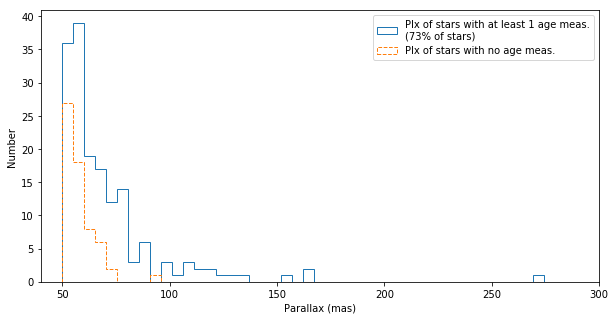

In [81]:
plt.figure(figsize=(10,5))
plt.hist(zip(*plx_yesage)[0],histtype='step',
         label='Plx of stars with at least 1 age meas.\n({:1.0f}% of stars)'.format(100*float(len(plx_yesage))/(len(plx_yesage) + len(plx_noage))),
         bins = np.linspace(50,300,50))
plt.hist(zip(*plx_noage)[0],histtype='step',label='Plx of stars with no age meas.',
         bins = np.linspace(50,300,50),linestyle='dashed')
plt.legend()
plt.xlim(40,300)
plt.xlabel('Parallax (mas)')
plt.ylabel('Number')
#axdist = plt.gca().twiny()
#axdist.hist(1/(np.array(plx_noage)[:,0]*1e-3),histtype='step',
#           bins = np.linspace(50,300,25),linestyle='dashed')
#axdist.set_xlim(1/40e-3,1/300e-3)
#axdist.set_xlabel('Distance (pc)')
plt.show()

Difference is more clear in a CDF in terms of distance:

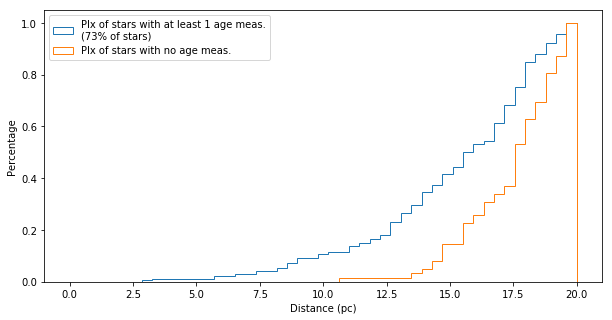

In [82]:
plt.figure(figsize=(10,5))
plt.hist(1e3/np.array(zip(*plx_yesage)[0]),histtype='step',
         label='Plx of stars with at least 1 age meas.\n({:1.0f}% of stars)'.format(100*float(len(plx_yesage))/(len(plx_yesage) + len(plx_noage))),
         bins = np.linspace(0,20,50),cumulative=1,normed=True)
plt.hist(1e3/np.array(zip(*plx_noage)[0]),histtype='step',label='Plx of stars with no age meas.',
         bins = np.linspace(0,20,50),cumulative=1,normed=True)
plt.legend(loc='upper left')
plt.ylabel('Percentage')
plt.xlabel('Distance (pc)')
plt.show()

Spectral types of stars with and without age measurements.

In [83]:
percen_FGK_yesage = np.zeros(3)

tot_stars = float(len(plx_yesage) + len(plx_noage))

for i, stype in enumerate(['F','G','K']):
    
    tot_stars = float(len(np.where(np.char.find(np.array(zip(*plx_yesage)[1]),stype) == 0)[0]) +\
                     len(np.where(np.char.find(np.array(zip(*plx_noage)[1]),stype) == 0)[0]))
    
    percen_FGK_yesage[i] = len(np.where(np.char.find(np.array(zip(*plx_yesage)[1]),stype) == 0)[0]) / tot_stars
    
print percen_FGK_yesage*100.

[ 100.           97.77777778   60.64516129]


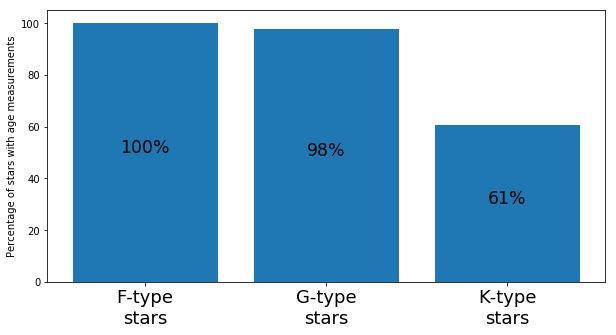

In [84]:
plt.figure(figsize=(10,5))
plt.bar(range(3),height=percen_FGK_yesage*100)
plt.ylabel('Percentage of stars with age measurements')
plt.xticks(range(3),['F-type\nstars','G-type\nstars','K-type\nstars'],fontsize='18')
for i, stype in enumerate(['F','G','K']):
    plt.text(i,percen_FGK_yesage[i]*100./2.,'{:1.0f}%'.format(percen_FGK_yesage[i]*100.),
            horizontalalignment='center',fontsize='xx-large')
plt.show()

In [348]:
c.close()